In [16]:
# Importamos las bibliotecas necesarias y el dataset previamente limpiado

import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import StratifiedKFold

from itertools import combinations
import sklearn.metrics as metrics

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [17]:
data_gym = pd.read_excel('DatosParaModelo.xlsx')

# Random Forest

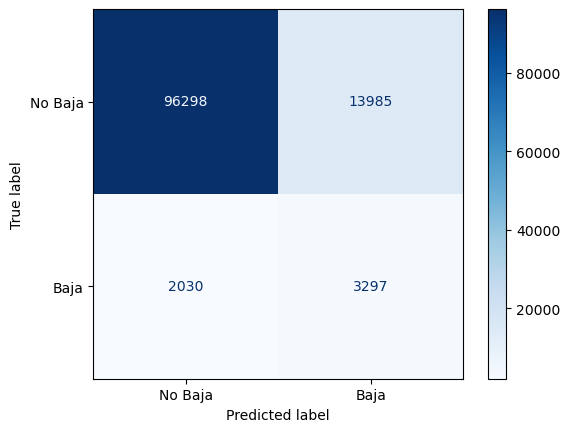

In [26]:
# Inicialización de la matriz de confusión y especificación del Umbral de Clasificación
conf_matrix_total = np.zeros((2, 2))
Umbral_Clasificación = 0.1

# Se configuran las variables de entrada y salida, la lista de identificadores de clientes, se prepara las divisiones del dataset con estratificación y se dimensional el modelo
X = data_gym.drop(columns = ['IdPersona', 'Baja', 'Mes'])
y = data_gym['Baja']
Id_Clientes = data_gym['IdPersona']
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=1)
Modelo_random_forest = RandomForestClassifier(max_depth=12, n_estimators=300, random_state=1)

# Bucle para iterar sobre los diferentes folds separando entre train y test con divisiones estratificadas según Ids de clientes
for Train_data, Test_data in kfold.split(X, y, Id_Clientes):
  X_train, X_test = X.iloc[Train_data], X.iloc[Test_data]
  y_train, y_test = y.iloc[Train_data], y.iloc[Test_data]    
  
  # Entrenamiento del modelo y predicción
  Modelo_random_forest.fit(X_train, y_train)
  Predicciones_rndm_frst = Modelo_random_forest.predict_proba(X_test)
  Predicciones_binarias = (Predicciones_rndm_frst[:, 1] >= Umbral_Clasificación).astype(int)
    
  # Se genera la matriz y se van sumando para cada iteración
  cm = confusion_matrix(y_test, Predicciones_binarias)
  conf_matrix_total = conf_matrix_total + cm
    
# Display de la matriz
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_total.astype(int), display_labels=['No Baja', 'Baja'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

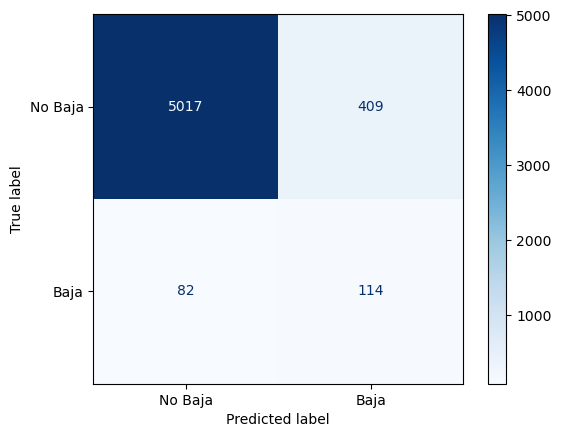

In [25]:
Fecha = pd.to_datetime('2023-12-01')
Umbral_Clasificación = 0.10

# Configuración de variables de entrada y salida
Train_data = data_gym[data_gym['Mes'] < Fecha]
Test_data = data_gym[data_gym['Mes'] == Fecha]

X_train = Train_data.drop(columns = ['IdPersona', 'Baja', 'Mes'])
X_test = Test_data.drop(columns = ['IdPersona', 'Baja', 'Mes'])
y_train = Train_data['Baja']
y_test = Test_data['Baja']

# Entrenamiento del modelo y predicción
Modelo_random_forest = RandomForestClassifier(max_depth=12, n_estimators=300, random_state=1)
Modelo_random_forest.fit(X_train, y_train)
Predicciones_rndm_frst = Modelo_random_forest.predict_proba(X_test)
Predicciones_binarias = (Predicciones_rndm_frst[:, 1] >= Umbral_Clasificación).astype(int)

# Generación y display de la matriz
cm = confusion_matrix(y_test, Predicciones_binarias)
disp = ConfusionMatrixDisplay(confusion_matrix=cm.astype(int), display_labels=['No Baja', 'Baja'])
disp.plot(cmap=plt.cm.Blues)
plt.show()